# SVM示例
本示例直接使用sklearn中的工具, 代码参考了[reference](https://www.kesci.com/home/project/5e7496a198d4a8002d2b1e43)

如果需要直接从0实现一个SVM，可以使用Python的cvxopt工具包，它可以直接对优化目标问题进行求解。

当然，还可以尝试自己实现SMO算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [2]:
# 使用iris数据集，iris是机器学习领域一个非常出名的小数据集
iris = datasets.load_iris()
# 为了方便在二维图像上显示分类结果，只使用两个特征
x = iris.data[:, :2]
y = iris.target

我们常用的是sklearn.svm.SVC，其中有个重要的参数kernel="linear"给了我们线性的决策边界：两类之间的分离边界是直线。多分类的工作方式就是"one versus one" ：在任意两类样本之间设计一个SVM，因此k个类别的样本就需要设计$\frac{k(k-1)}{2}$个SVM。当对一个未知样本进行分类时，
最后得票最多的类别即为该未知样本的类别。线性支持向量分类器（LinearSVC）：对于线性核函数，有一个新的对象LinearSVC ，它使用了不同的算法, 在稀疏数据集表现很好, 它对于多分类采用的是"one versus all"策略。

In [3]:
svc = svm.SVC(kernel='linear')
svc.fit(x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
# 将上述结果可视化
# iris是三分类问题，所以需要三种颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [5]:
def plot_emit(clf: svm.SVC, x, y):
    x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
    y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                        np.linspace(y_min, y_max, 100))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

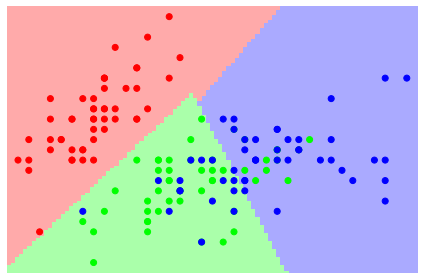

In [6]:
plot_emit(svc, x, y)
plt.show()

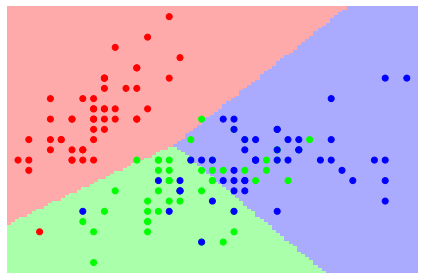

In [7]:
# 使用LinearSVC
clf = svm.LinearSVC(max_iter=10000)
clf.fit(x, y)
plot_emit(clf, x, y)

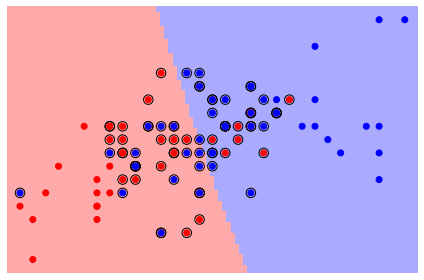

In [8]:
x, y = x[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]
clf = svm.SVC()
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.show()

- **正则化**: 只考虑支持向量就是一种正则化的形式，实际上，它强迫模型在处理样本的特征的时候更加简单
- 正则项可以通过调整系数C来决定
    - 小的C值: 将会有很多支持向量，决策边界为类别A的平均值减去类别B的平均值
    - 大的C值: 将会有较少的支持向量。决策边界是被大多数支持向量所决定的

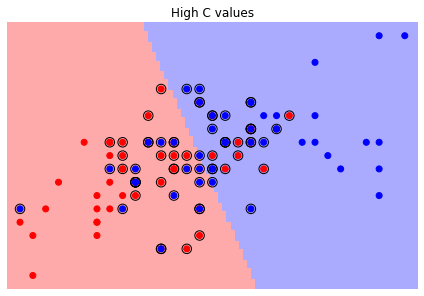

In [9]:
# 将松弛变量的惩罚系数设置为较大的一个值，这样只有少数是支持向量
clf = svm.SVC(kernel='linear', C=1e4)
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.title("High C values")
plt.show()

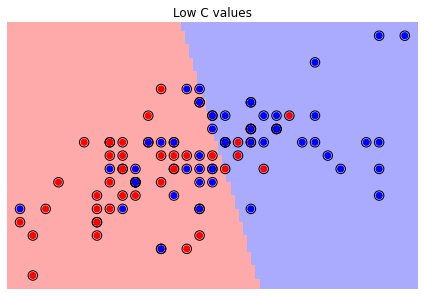

In [10]:
# 设置松弛变量的耗费极小，那么就会有很多支持向量，甚至全部是支持向量
clf = svm.SVC(kernel='linear', C=1e-3)
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.title("Low C values")
plt.show()

## 核方法
在需要非线性分类边界的时候，就需要核方法
- **linear**: 线性核，会产生线性分类边界
- **poly**: 多项式核，会产生式分类边界
- **rbf**: 径向基函数，也就像高斯核，是根据与每一个支持向量的距离来决定分类边界。 

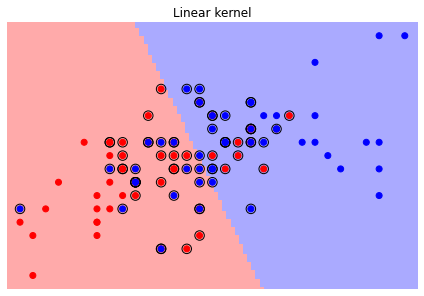

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.title('Linear kernel')
plt.show()

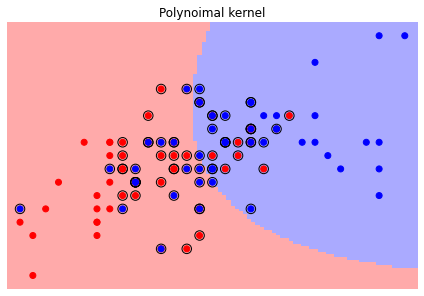

In [12]:
clf = svm.SVC(kernel='poly', degree=4)
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.title('Polynoimal kernel')
plt.show()

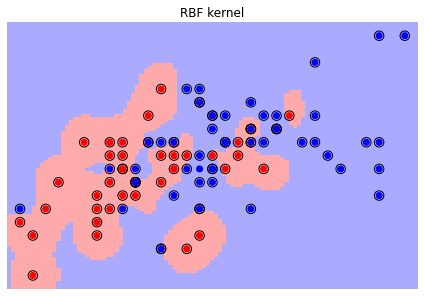

In [13]:
clf = svm.SVC(kernel='rbf', gamma=1e2)
clf.fit(x, y)
plot_emit(clf, x, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=90, edgecolors='black', facecolors='none', zorder=10)
plt.title('RBF kernel')
plt.show()